In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x = np.linspace(-1,1,4)
y = np.linspace(-1,1,4)

xx, yy = np.meshgrid(x, y)
a = zip(x, y)
xx.flatten(), yy.flatten()

(array([-1.        , -0.33333333,  0.33333333,  1.        , -1.        ,
        -0.33333333,  0.33333333,  1.        , -1.        , -0.33333333,
         0.33333333,  1.        , -1.        , -0.33333333,  0.33333333,
         1.        ]),
 array([-1.        , -1.        , -1.        , -1.        , -0.33333333,
        -0.33333333, -0.33333333, -0.33333333,  0.33333333,  0.33333333,
         0.33333333,  0.33333333,  1.        ,  1.        ,  1.        ,
         1.        ]))

In [2]:
from py.kernels import gaussian

In [10]:
X,Y


(array([[-5.        , -3.57142857, -2.14285714, -0.71428571,  0.71428571,
          2.14285714,  3.57142857],
        [-5.        , -3.57142857, -2.14285714, -0.71428571,  0.71428571,
          2.14285714,  3.57142857],
        [-5.        , -3.57142857, -2.14285714, -0.71428571,  0.71428571,
          2.14285714,  3.57142857],
        [-5.        , -3.57142857, -2.14285714, -0.71428571,  0.71428571,
          2.14285714,  3.57142857],
        [-5.        , -3.57142857, -2.14285714, -0.71428571,  0.71428571,
          2.14285714,  3.57142857],
        [-5.        , -3.57142857, -2.14285714, -0.71428571,  0.71428571,
          2.14285714,  3.57142857],
        [-5.        , -3.57142857, -2.14285714, -0.71428571,  0.71428571,
          2.14285714,  3.57142857]]),
 array([[-5.        , -5.        , -5.        , -5.        , -5.        ,
         -5.        , -5.        ],
        [-3.57142857, -3.57142857, -3.57142857, -3.57142857, -3.57142857,
         -3.57142857, -3.57142857],
        

for -0.5 the integral approxi (sum*dx) is 0.143288
for -1.0 the integral approxi (sum*dx) is 0.282018
for -500.0 the integral approxi (sum*dx) is 1.000000
for 0.0 the integral approxi (sum*dx) is 0.130711


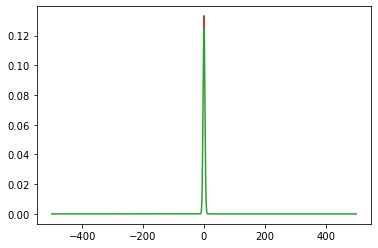

In [12]:
x1, dx1 = np.linspace(-0.5,0.5,13, retstep=True)
x2, dx2 =np.linspace(-1,1,13, retstep=True)
x3, dx3 =np.linspace(-500,500,2051, retstep=True)

x4, dx4 =np.linspace(0,1,851, retstep=True)

x=[x1,x2,x3, x4]
dx=[dx1,dx2,dx3, dx4]

for i in range(4):
    print('for %s the integral approxi (sum*dx) is %f' %(str(x[i][0]), np.sum(gaussian(3, x[i])*dx[i])))
    plt.plot(x[i], gaussian(3, x[i]))

In [2]:
ke = np.array([2,1,0,1])
ue = np.array([1,0.5,0.6,0.4])

ke*ue


array([2. , 0.5, 0. , 0.4])

In [3]:
def integral_approxi(ke, ue):
    n=len(ue)
    ke_mtx = np.zeros((n,n))
    
    for j in range(n):
        ke_mtx[j] = np.roll(ke, j)
    
    le = np.zeros(n)
    
    for j in range(n):
        le[j] = ke_mtx[j]@ue
    
    return le

In [4]:
def integral_fft(ke, ue):
    ke_fft = np.fft.fft(ke)
    ue_fft = np.fft.fft(ue)
    
    mix = ke_fft*ue_fft
    
    mix_real = np.fft.ifft(mix).real
    
    return mix_real


In [43]:
params={'n': 8, 'length': 5}

In [44]:
from py.params import setParams

ps = setParams(params)
u = np.random.uniform(0.1, 0.2, ps.n)

sigma_i=3.00 was initialised too large 3.00>=2.50==length/2 -> reset to sigma_i/(length/2)=1.20.


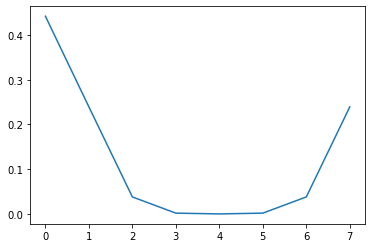

In [45]:
plt.plot(ps.ke)

In [50]:
fig, (ax1, ax2) = plt.subfigure((1,2), figsize=(10,6))
ax1.plot(ps.ke_fft)
own = np.fft.fft(ps.ke)
ax2.plot(own)

AttributeError: module 'matplotlib.pyplot' has no attribute 'subfigure'

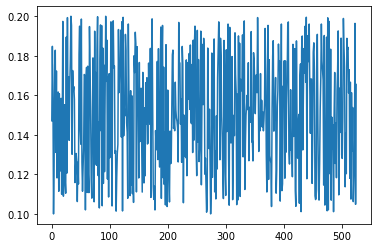

In [31]:
ax = plt.plot(u)
#ax.set_ylim(bottom=0, top=1)#

In [54]:
uf = np.fft.fft(u)
given_fft = ps.ke_fft*uf
given_fft = np.fft.ifft(given_fft).real
own_fft = integral_fft(ps.ke, u)
approxi = integral_approxi(ps.ke, u)

if all(given_fft==own_fft):
    print('YES, THEY ARE THE SAME!!!!')

YES, THEY ARE THE SAME!!!!


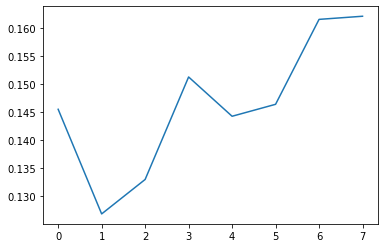

In [55]:
plt.plot(given_fft)

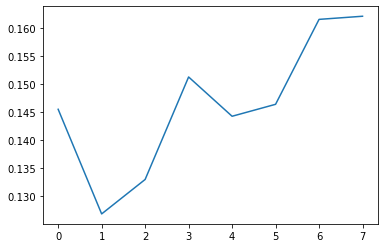

In [56]:
plt.plot(own_fft)

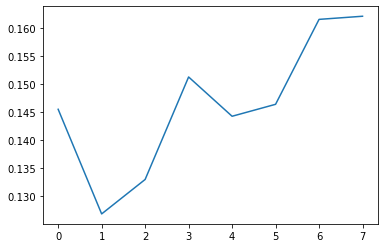

In [57]:
plt.plot(approxi)

In [1]:
def sigmoidal(x, b, mu):
    return (1/(1+np.exp(-b*(x-mu))))

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2441/142489649.py:2: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-b*(x-mu))))
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2441/142489649.py:2: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-b*(x-mu))))


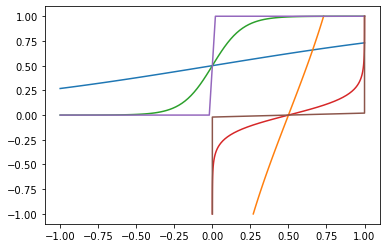

In [5]:
x=np.linspace(-1,1,101)
bs = [1,10,1000]
for b in bs:
    plt.plot(x,sigmoidal(x,b,0))
    plt.plot(sigmoidal(x,b,0),x)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from py.twoD.kernels2d import gaussian

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from py.twoD.params2d import setParams

In [21]:
params={'xlength': 1, 'ylength': 1, 'n': 2, 'm': 2}
ps = setParams(params)

In [22]:
ps.time_stamps

array([    0,  2000,  4000,  6000,  8000, 10000, 12000, 14000, 16000,
       18000, 20000])

In [23]:
len(ps.time)

20001

In [24]:
ps.xcoords, ps.ycoords

(array([[-0.5,  0. ],
        [-0.5,  0. ]]),
 array([[-0.5, -0.5],
        [ 0. ,  0. ]]))

In [17]:
ps.ke, ps.ki

(array([[0.0309875 , 0.03511344],
        [0.03511344, 0.03978874]]),
 array([[0.00429986, 0.00435999],
        [0.00435999, 0.00442097]]))

In [18]:
ps.ke_fft, ps.ki_fft

(array([[0.14100311+0.j, 0.00880124+0.j],
        [0.00880124+0.j, 0.00054936+0.j]]),
 array([[1.74408119e-02+0.j, 1.21114802e-04+0.j],
        [1.21114802e-04+0.j, 8.41061496e-07+0.j]]))

In [25]:
ps.ke_fft, ps.ki_fft

(array([[ 0.14100311+0.j, -0.00880124+0.j],
        [-0.00880124+0.j,  0.00054936+0.j]]),
 array([[ 1.74408119e-02+0.j, -1.21114802e-04+0.j],
        [-1.21114802e-04+0.j,  8.41061496e-07+0.j]]))

In [26]:
ps.ke_fft[:,0]

array([ 0.14100311+0.j, -0.00880124+0.j])

In [27]:
ps.ke_fft[0,:]

array([ 0.14100311+0.j, -0.00880124+0.j])

In [ ]:
plt.plot()